In [158]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore',category=DeprecationWarning)
filterwarnings('ignore', category=FutureWarning)
filterwarnings('ignore', category=UserWarning)
filterwarnings('ignore')

In [159]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)


Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [160]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [161]:
num_labes = len(np.unique(y_train))

num_labes

10

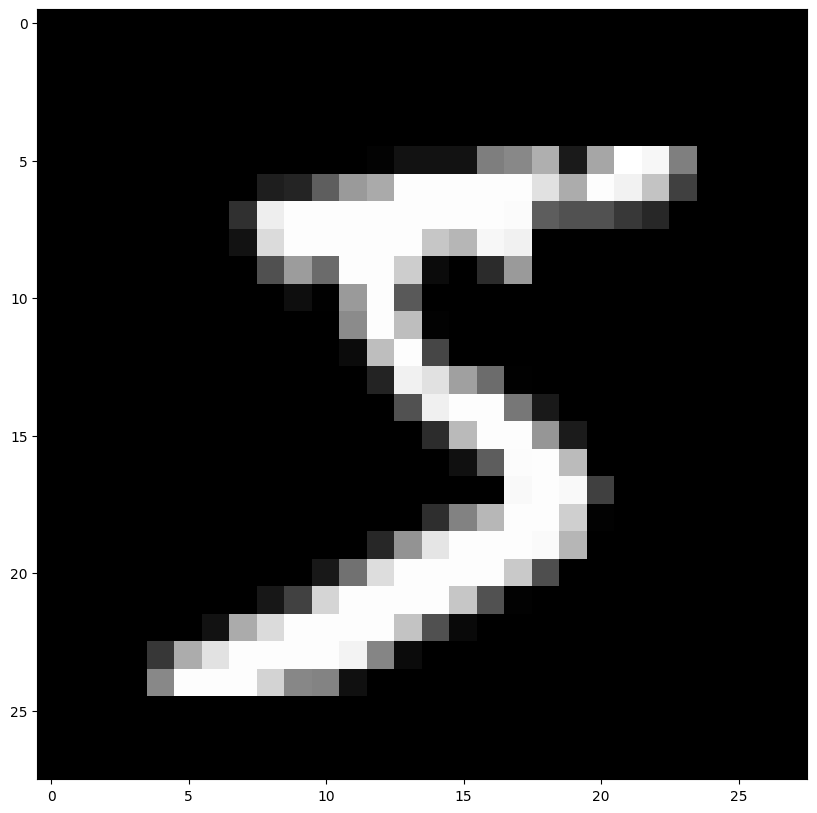

In [162]:
# Örnek gösterilmesi 

plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap="gray")

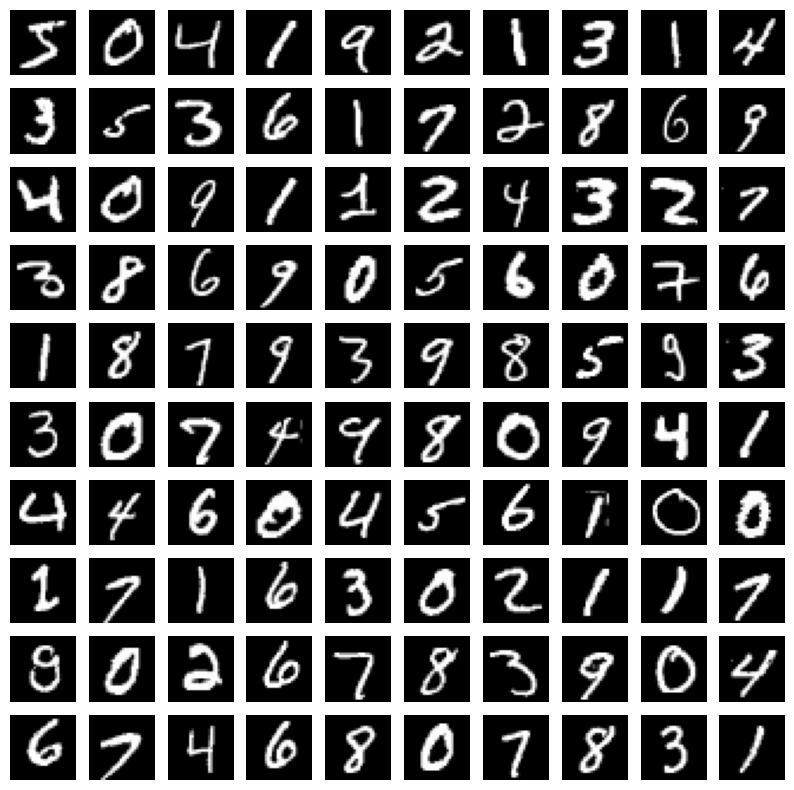

In [163]:
plt.figure(figsize=(10,10))
for n in range(100):
    ax = plt.subplot(10,10,n+1)
    plt.imshow(x_train[n],cmap="gray")
    plt.axis('off')

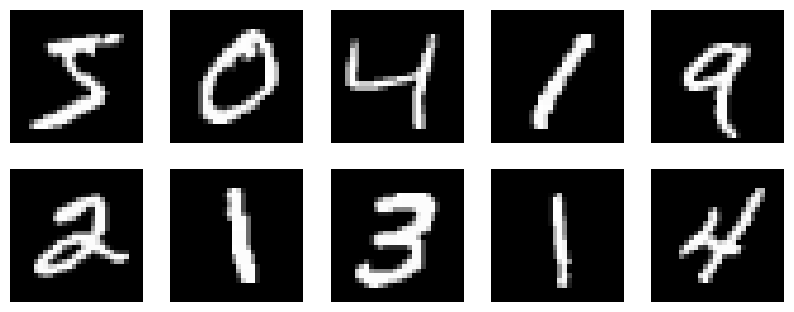

In [164]:
def visualize_img(data):
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(data[n],cmap="gray")
        plt.axis('off')

visualize_img(x_train)

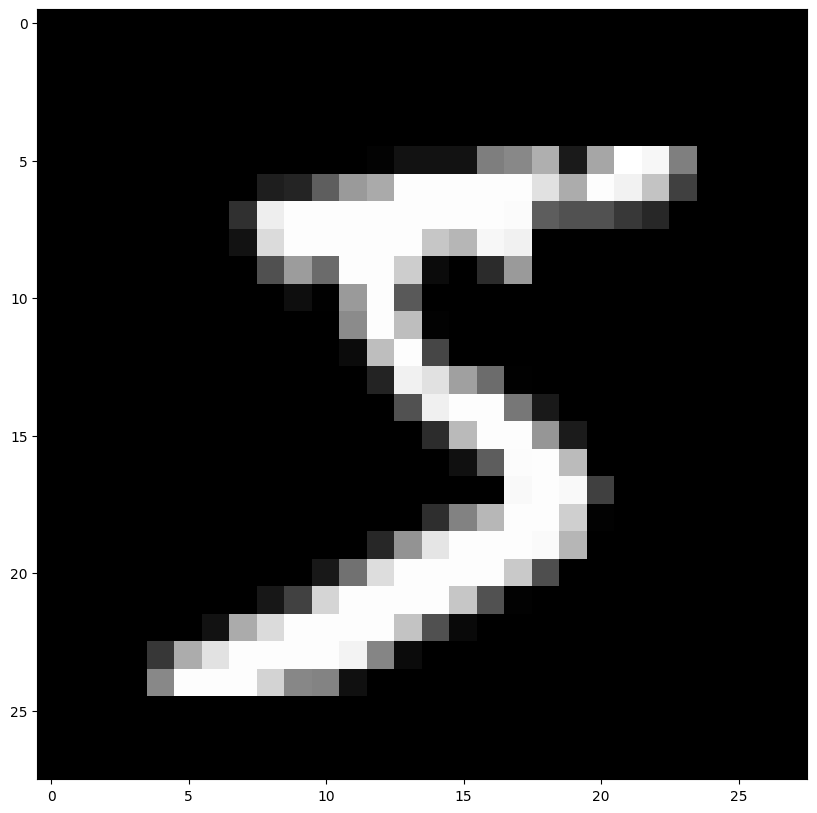

In [165]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[0],cmap="gray")

In [166]:
x_train[2][14,10]


49

In [167]:
x_train[2].sum()

19443

In [168]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [169]:
x_train[2][14:20,10:20].mean()

96.51666666666667

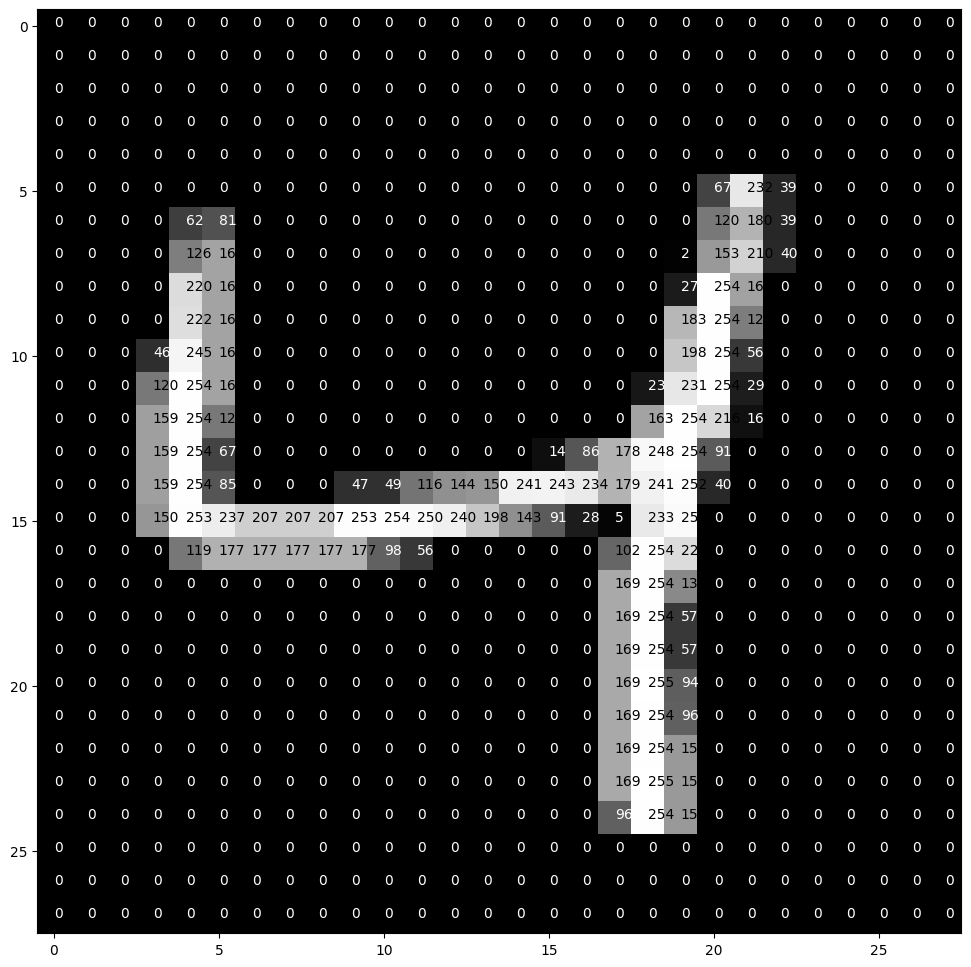

In [170]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width, height = img.shape
    threshold = img.max() / 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x), color = 'white' if img[x][y] < threshold else
                        'black')
pixel_visualize(x_train[2])

In [171]:
# Encoding işlemi bağımlı değişkene etki eder yani etikete 

y_train[0:5]


array([5, 0, 4, 1, 9], dtype=uint8)

In [172]:
y_train = to_categorical(y_train)  #burada one hot encoding işlemi gerçekleşti.
y_test = to_categorical(y_test)

In [173]:
# reshaping işlemi 

image_size = x_train.shape[1]

image_size

28

In [174]:
print(f"x_train boyutu: {x_train.shape}")


x_train boyutu: (60000, 28, 28)


In [175]:
print(f"x_test boyutu: {x_test.shape}")

x_test boyutu: (10000, 28, 28)


In [176]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [177]:
print(f"x_train boyutu: {x_train.shape}")

x_train boyutu: (60000, 28, 28, 1)


In [178]:
print(f"x_test boyutu: {x_test.shape}") 

#buradaki yeni eklenen 1 görsellerdeki piksel değerlerini tutar.
# bunun yapılma sebebi görüntü içindeki piksel değeri ile çalışacak olmamız 

x_test boyutu: (10000, 28, 28, 1)


In [179]:
#normalizasyon işlemi

# bu değerleri 0 ile 1 arasını çekmemiz gerekecek yani 0 ile 255 arası değer verilmiş pikselleri
# yapılma sebebi daha iyi öğrenim ve daha iyi sonuç vermesi amacıyla yapılması gerekiyor.

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [180]:
#Sinir Ağı Mimarisini Tanımlamak

model = Sequential([
    Flatten(input_shape = (28,28,1)), # Flatten burda bir katman veri setini sinir ağının anlayacağı şekle dönüştürür.
    Dense(units=128,activation='relu',name='layer1'), # Hidden Layer 128 nöron var aslında burda 128 tane  farklı özellik çıkarımı var.
    Dense(units=num_labes, activation='softmax', name='output_layer')
                    ])

#buradaki işlemleri dış özellik olarak alabiliriz.

In [181]:
model.compile(loss='categorical_crossentropy', # 2 den fazla sınıf olduğunda optimize edilecek kayıp fonk.
              optimizer='adam',  # loss minimize edicek fonk.
              metrics=[tf.keras.metrics.Precision(), 
             tf.keras.metrics.Recall(), 'accuracy'])

#buradaki işlemleri iç özellik oalrak alabiliriz.

In [182]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
# modeli kurma ve çalıştırma 

model.fit(x_train,y_train, epochs=10,batch_size=128, validation_data=(x_test,y_test))

#batch_size burada her döngüde 128 tane gözlem birimine göre ağırlıkta değişim yap demek.


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3632 - precision_5: 0.9459 - recall_5: 0.8497 - accuracy: 0.8996 - val_loss: 0.2044 - val_precision_5: 0.9561 - val_recall_5: 0.9292 - val_accuracy: 0.9412
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1709 - precision_5: 0.9634 - recall_5: 0.9407 - accuracy: 0.9514 - val_loss: 0.1445 - val_precision_5: 0.9672 - val_recall_5: 0.9505 - val_accuracy: 0.9585
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1221 - precision_5: 0.9727 - recall_5: 0.9583 - accuracy: 0.9655 - val_loss: 0.1163 - val_precision_5: 0.9723 - val_recall_5: 0.9604 - val_accuracy: 0.9661
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0938 - precision_5: 0.9783 - recall_5: 0.9681 - accuracy: 0.9729 - val_loss: 0.0997 - val_precision_5: 0.9751 - val_recall_5: 0.9650 - val_accuracy: 0.9697
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

In [184]:
history = model.fit(x_train,y_train, epochs=10,batch_size=128, validation_data=(x_test,y_test))

history

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0257 - precision_5: 0.9945 - recall_5: 0.9921 - accuracy: 0.9931 - val_loss: 0.0752 - val_precision_5: 0.9794 - val_recall_5: 0.9755 - val_accuracy: 0.9773
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0223 - precision_5: 0.9952 - recall_5: 0.9934 - accuracy: 0.9942 - val_loss: 0.0733 - val_precision_5: 0.9805 - val_recall_5: 0.9769 - val_accuracy: 0.9786
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0185 - precision_5: 0.9961 - recall_5: 0.9948 - accuracy: 0.9954 - val_loss: 0.0721 - val_precision_5: 0.9814 - val_recall_5: 0.9787 - val_accuracy: 0.9800
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0157 - precision_5: 0.9969 - recall_5: 0.9959 - accuracy: 0.9965 - val_loss: 0.0748 - val_precision_5: 0.9801 - val_recall_5: 0.9767 - val_accuracy: 0.9788
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss

Text(0.5, 1.0, 'Eğitim ve Başarım Grafiği')

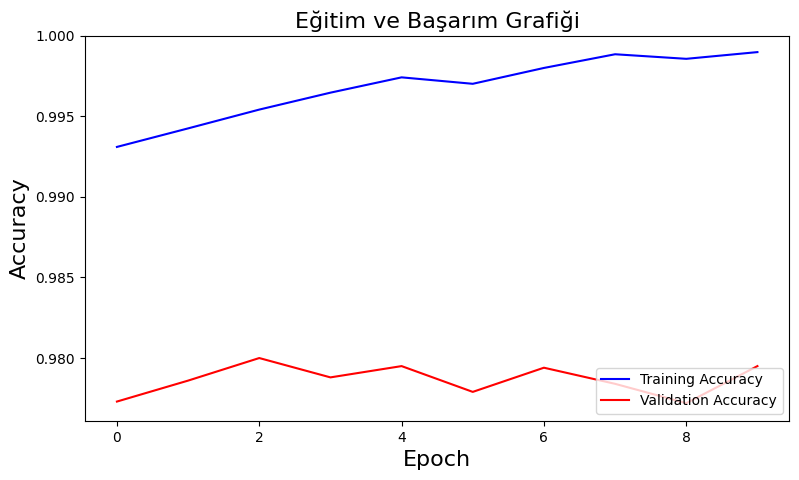

In [185]:
# Accuracy ve Loss Grafikleri

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label ="Training Accuracy")
plt.plot(history.history['val_accuracy'], color='r', label ="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel ('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Başarım Grafiği', fontsize = 16)

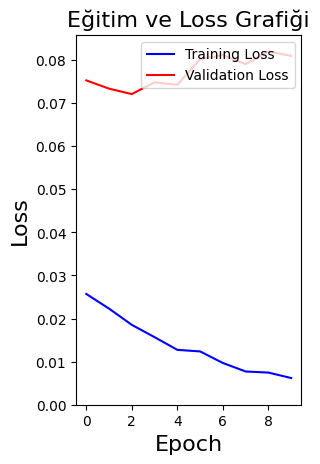

In [186]:
# Loss grafiği 

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label ="Training Loss")
plt.plot(history.history['val_loss'], color='r', label ="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel ('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Loss Grafiği', fontsize = 16)
plt.show()

In [187]:
loss, precision, recall, acc = model.evaluate(x_test,y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))


Test Accuracy: 97.9%

Test Loss: 8.1%

Test Precision: 98.1%

Test Recall: 97.9%


In [188]:
# modeli kaydetme ve tahmin için kullanma

model.save('mnist_model.h5')

In [189]:
import random 

random = random.randint(0, x_test.shape[0])

random # 440. veri geldi

4079

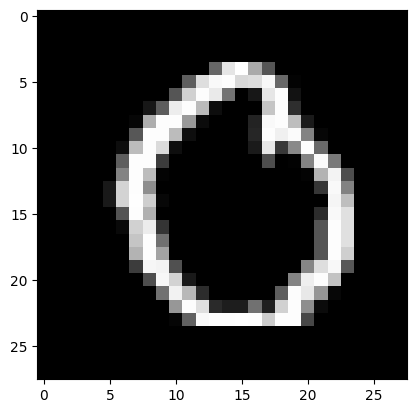

In [190]:
test_image = x_test[random]

y_test[random]

plt.imshow(test_image.reshape(28,28), cmap='gray')

In [191]:
test_data = x_test[random].reshape(1,28,28,1)

tahmin = model.predict(test_data)

tahmin

1/1 [==============================] - 0s 40ms/step


array([[9.9999762e-01, 1.2702329e-11, 4.5696149e-09, 4.5874950e-11,
        2.2777507e-11, 1.8568628e-11, 1.3506799e-06, 1.8638713e-07,
        8.8249209e-07, 8.3685403e-10]], dtype=float32)

In [192]:
tahmin_sinifi = np.argmax(tahmin)

tahmin_sinifi

0